<a href="https://colab.research.google.com/github/AyaTaha16/Generative_AI_DEPI/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab
import numpy as np
import matplotlib.pyplot as plt

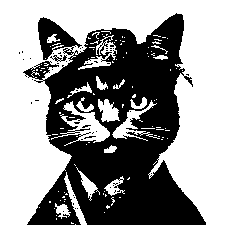

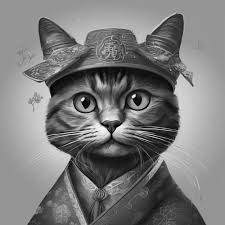

In [ ]:
# Read the color image
image = cv2.imread('/content/download.jfif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the grayscale image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the binary image using cv2_imshow
cv2_imshow(binary_image) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0) # These functions are not needed when using cv2_imshow
# cv2.destroyAllWindows()
cv2_imshow(gray_image)

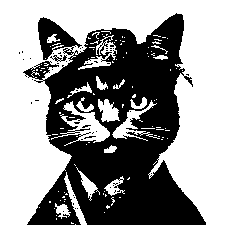

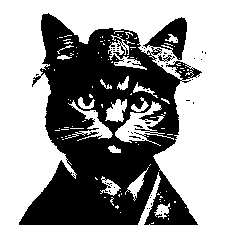

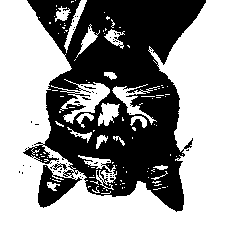

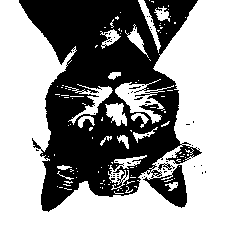

In [ ]:
# Flip the image horizontally
flipped_horizontal = cv2.flip(binary_image, 1)

# Flip the image vertically
flipped_vertical = cv2.flip(binary_image, 0)

# Flip the image both horizontally and vertically
flipped_both = cv2.flip(binary_image, -1)

# Display the original and flipped images
cv2_imshow(binary_image)
cv2_imshow( flipped_horizontal)
cv2_imshow( flipped_vertical)
cv2_imshow( flipped_both)
cv2.waitKey(0)
cv2.destroyAllWindows()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
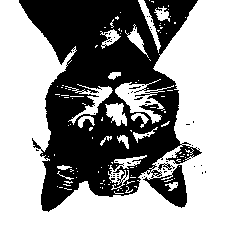

In [ ]:
flipped_both

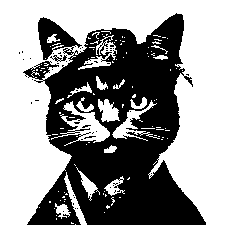

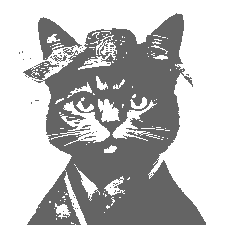

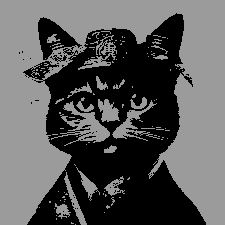

In [ ]:
brightness_factor = 100
brightened_image = cv2.add(binary_image, brightness_factor)
darkness_factor = 100
darkened_image = cv2.subtract(binary_image, darkness_factor)

# Display the original and brightened images
cv2_imshow( binary_image)
cv2_imshow( brightened_image)
cv2_imshow( darkened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def smooth_image(image, kernel_size):
    """
    Apply a smoothing filter to an image without using built-in functions.

    Args:
        image (numpy.ndarray): The input image.
        kernel_size (int): The size of the smoothing kernel.

    Returns:
        numpy.ndarray: The smoothed image.
    """
    height, width = image.shape
    smoothed_image = np.zeros_like(image)

    # Iterate over the image
    for i in range(height):
        for j in range(width):
            # Calculate the sum of pixel values in the kernel
            kernel_sum = 0
            for k in range(max(0, i - kernel_size // 2), min(height, i + kernel_size // 2 + 1)):
                for l in range(max(0, j - kernel_size // 2), min(width, j + kernel_size // 2 + 1)):
                    kernel_sum += image[k, l]

            # Calculate the average value and assign it to the smoothed image
            smoothed_image[i, j] = kernel_sum // (kernel_size ** 2)

    return smoothed_image

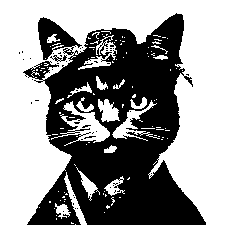

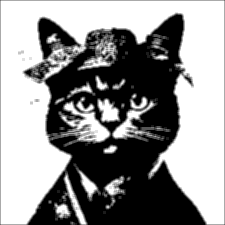

In [ ]:
# Apply the average filter
filtered_image = smooth_image(binary_image,3)

# Display the original and filtered images
cv2_imshow(binary_image)
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def smooth_and_center(image, background_kernel_size=21, image_scale_factor=0.5):
    """
    Smooth the background of an image, resize the original image, and put it in the center of the smoothed background.

    Args:
        image (numpy.ndarray): The input image.
        background_kernel_size (int): The size of the smoothing kernel for the background.
        image_scale_factor (float): The scale factor for resizing the original image.

    Returns:
        numpy.ndarray: The image with the smoothed background and the resized original image in the center.
    """
    # Smooth the background
    background = smooth_image(image, background_kernel_size)

    # Resize the original image
    height, width = image.shape[:2]
    new_height = int(height * image_scale_factor)
    new_width = int(width * image_scale_factor)
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Get the dimensions of the resized image
    resized_height, resized_width = resized_image.shape[:2]

    # Calculate the coordinates to center the resized image
    x = (background.shape[1] - resized_width) // 2
    y = (background.shape[0] - resized_height) // 2

    # Create a new image with the smoothed background and the resized image in the center
    result = background.copy()
    result[y:y+resized_height, x:x+resized_width] = resized_image

    return result

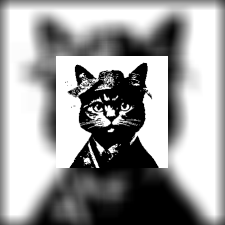

In [ ]:
result = smooth_and_center(binary_image, background_kernel_size=21, image_scale_factor=0.5)
# Display the result
cv2_imshow( result)
cv2.waitKey(0)
cv2.destroyAllWindows()

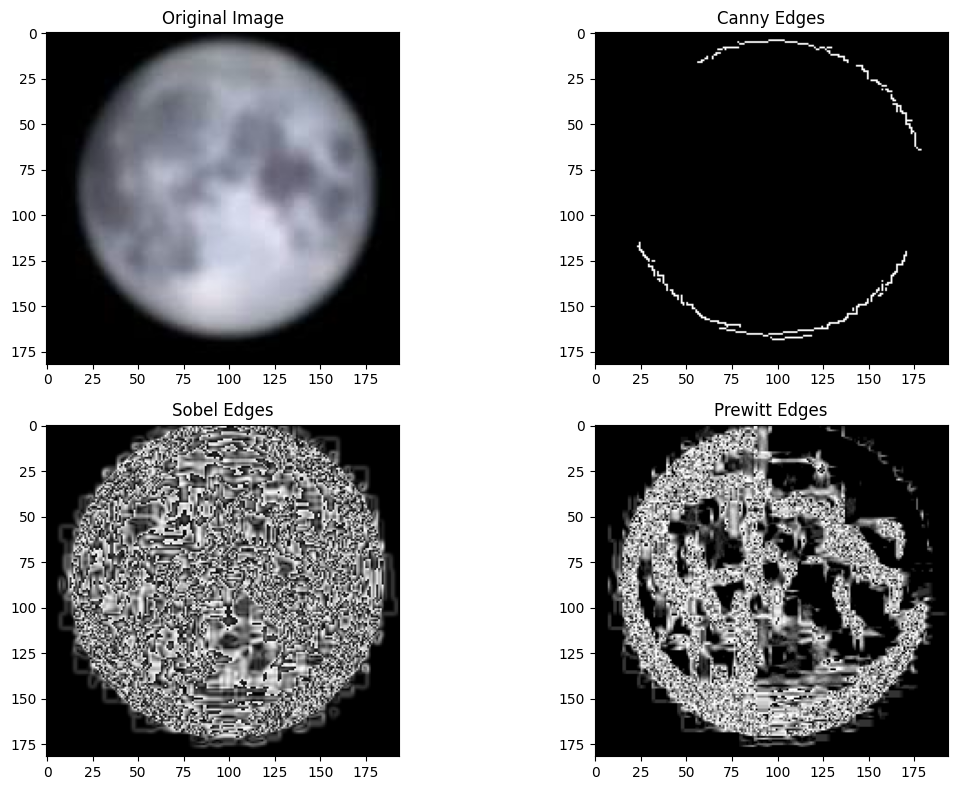

In [ ]:
# Load the original image
original_image = cv2.imread('/content/download (1).jfif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny_edges = cv2.Canny(original_image, 100, 200)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edges = np.uint8(sobel_edges)

# Apply Prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx) # Apply the Prewitt filter manually using filter2D
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_edges = np.uint8(prewitt_edges)

# Display the results side-by-side
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(original_image, cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(canny_edges, cmap='gray')
axes[0, 1].set_title('Canny Edges')

axes[1, 0].imshow(sobel_edges, cmap='gray')
axes[1, 0].set_title('Sobel Edges')

axes[1, 1].imshow(prewitt_edges, cmap='gray')
axes[1, 1].set_title('Prewitt Edges')

plt.tight_layout()
plt.show()

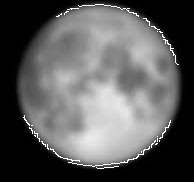

In [ ]:
res=cv2.addWeighted(gray_image,1,canny_edges,5,0)
cv2_imshow( res)

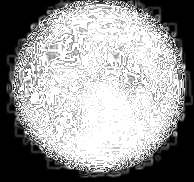

In [ ]:
res=cv2.addWeighted(gray_image,1,sobel_edges,1,0)
cv2_imshow( res)

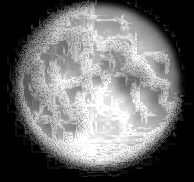

In [ ]:
res=cv2.addWeighted(gray_image,1,prewitt_edges,5,0)
cv2_imshow( res)